# Pyregion Test
Test pyregion to get image physical coordinates from a region file



In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import h5py
from astropy.wcs import WCS
import pyregion

In [16]:
file =  h5py.File('/media/carterrhea/carterrhea/M33/M33_Field7_SN3.merged.cm1.1.0.hdf5', 'r')
list(file.keys())

['calib_map',
 'calib_map_hdr',
 'deep_frame',
 'header',
 'quad000',
 'quad001',
 'quad002',
 'quad003',
 'quad004',
 'quad005',
 'quad006',
 'quad007',
 'quad008']

In [24]:
file['calib_map'][()]

array([[556.3815918 , 556.3885498 , 556.39544678, ..., 576.59539795,
        576.60797119, 576.62054443],
       [556.37896729, 556.38586426, 556.39282227, ..., 576.5927124 ,
        576.60534668, 576.61791992],
       [556.37634277, 556.38323975, 556.39019775, ..., 576.59008789,
        576.60266113, 576.61529541],
       ...,
       [555.78833008, 555.79522705, 555.80218506, ..., 575.97509766,
        575.9876709 , 576.00024414],
       [555.79040527, 555.79730225, 555.80426025, ..., 575.97717285,
        575.98974609, 576.00231934],
       [555.79248047, 555.79937744, 555.80633545, ..., 575.97924805,
        575.99182129, 576.00439453]])

In [5]:
for attr in file.attrs:
    print(attr)
    print(file.attrs[attr])

author
b'Thomas Martin (thomas.martin.1@ulaval.ca)'
class
b'OutHDFQuadCube'
date
b'2019-02-04 12:55:21.750433'
dimx
2048
dimy
2064
dimz
842
program
b'Generated by ORB version 3.4'
quad_nb
9


In [5]:
div_nb = 3
quad_number = 1

quad_nb = file.attrs['quad_nb']#div_nb**2
dimx = file.attrs['dimx']
dimy = file.attrs['dimy']
dimz = file.attrs['dimz']
def get_quadrant_dims(quad_number):
    if (quad_number < 0) or (quad_number > quad_nb - 1):
        raise StandardError("quad_number out of bounds [0," + str(quad_nb- 1) + "]")
        return "SOMETHING FAILED"

    index_x = quad_number % div_nb
    index_y = (quad_number - index_x) / div_nb

    x_min = index_x * np.floor(dimx / div_nb)
    if (index_x != div_nb - 1):            
        x_max = (index_x  + 1) * np.floor(dimx / div_nb)
    else:
        x_max = dimx

    y_min = index_y * np.floor(dimy / div_nb)
    if (index_y != div_nb - 1):            
        y_max = (index_y  + 1) * np.floor(dimy / div_nb)
    else:
        y_max = dimy
    return int(x_min), int(x_max), int(y_min), int(y_max)

In [6]:
cube_final = np.zeros((dimx, dimy, dimz))
for iquad in range(quad_nb):
    #print(iquad)
    xmin,xmax,ymin,ymax=get_quadrant_dims(iquad)
    #print(xmin, xmax, ymin, ymax)
    iquad_data = file['quad00%i'%iquad]['data'][:]
    #print(iquad_data.shape)
    iquad_data[(np.isfinite(iquad_data) == False)]= 1e-22 # Modifs
    iquad_data[(iquad_data < -1e-16)]= -1e-22 # Modifs
    iquad_data[(iquad_data > 1e-9)]= 1e-22 # Modifs
    cube_final[xmin:xmax, ymin:ymax, :] = iquad_data



In [7]:
hdr = fits.Header()
hdr_dict = {}
header_cols = [str(val[0]).replace("'b",'').replace("'", "").replace("b",'') for val in list(file['header'][()])]
header_vals = [str(val[1]).replace("'b",'').replace("'", "").replace("b",'') for val in list(file['header'][()])]
header_types = [val[3] for val in list(file['header'][()])]
print(np.unique(header_types))
for header_col, header_val, header_type in zip(header_cols,header_vals, header_types):
    if 'bool' in str(header_type):
        hdr[header_col] = bool(header_val)
        hdr_dict[header_col] = bool(header_val)
    if 'float' in str(header_type):
        hdr[header_col] = float(header_val)
        hdr_dict[header_col] = float(header_val)
    if 'int' in str(header_type):
        hdr[header_col] = int(header_val)
        hdr_dict[header_col] = int(header_val)
    #print(header_type)
    else:
        try:
            hdr_dict[header_col] = float(header_val)
        except:
            hdr[header_col] = str(header_val)
            hdr_dict[header_col] = str(header_val)
hdr_dict['CTYPE3'] = 'WAVE-SIP'
hdr_dict['CUNIT3'] = 'm'

[b"<type 'bool'>" b"<type 'float'>" b"<type 'int'>"
 b"<type 'numpy.float128'>" b"<type 'numpy.float64'>"
 b"<type 'numpy.int64'>" b"<type 'str'>"]


In [21]:
hdr_dict

{'SIMPLE': 'True',
 'BITPIX': -64,
 'NAXIS': 2,
 'NAXIS1': 2048,
 'NAXIS2': 2064,
 'EXTEND': 'True',
 'FILETYPE': 'Calirated Spectrum Cue',
 'OBSERVAT': 'CFHT',
 'TELESCOP': 'CFHT',
 'INSTRUME': 'SITELLE',
 'ORBSVER': '',
 'OPTNAME': 'M33_Field7_SN3_18B',
 'OBJECT': 'M33_Field7',
 'EXPTIME': 13.3,
 'FILTER': 'SN3',
 'DATE-OBS': '2018-10-04',
 'ORDER': 8.0,
 'STEP': 2943.025792,
 'STEPNB': 842,
 'TARGETR': '1:32:50.69',
 'TARGETD': '30:34:50.0',
 'TARGETX': 1023.5,
 'TARGETY': 1031.5,
 'CAMERA': 'MERGED_DATA',
 'BINNING': 1,
 'CALIBNM': 543.5,
 'CALIBOR': 11,
 'CALIBST': 3255.231,
 'CTYPE1': 'RA---TAN-SIP',
 'CRVAL1': 23.2112083333,
 'CUNIT1': 'deg',
 'CRPIX1': 1077.08705104,
 'CDELT1': 1.0,
 'CROTA1': 0.0,
 'CTYPE2': 'DEC--TAN-SIP',
 'CRVAL2': 30.5805555556,
 'CUNIT2': 'deg',
 'CRPIX2': 1033.22775456,
 'CDELT2': 1.0,
 'CROTA2': 0.0,
 'WAVTYPE': 'WAVENUMBER',
 'CTYPE3': 'WAVE-SIP',
 'CRVAL3': 14093.278571904804,
 'CUNIT3': 'm',
 'CRPIX3': 1.0,
 'CDELT3': 2.0922325670880095,
 'CROTA3': 0

In [8]:
wcs_data = WCS(hdr_dict, naxis=2)
wcs_data

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN-SIP'  'DEC--TAN-SIP'  
CRVAL : 23.2112083333  30.5805555556  
CRPIX : 1077.08705104  1033.22775456  
PC1_1 PC1_2  : -8.98859430691e-05  -8.1451808379e-07  
PC2_1 PC2_2  : -8.1451808379e-07  8.98859430691e-05  
CDELT : 1.0  1.0  
NAXIS : 2048  2064

In [9]:
hdu = fits.PrimaryHDU()
hdu.data = np.mean(cube_final, axis=2)
hdu.header = wcs_data.to_header()
fits.writeto('deep_image.fits', np.mean(cube_final, axis=2).T, wcs_data.to_header(), overwrite=True)
#hdu.writeto('deep_image.fits', overwrite=True)

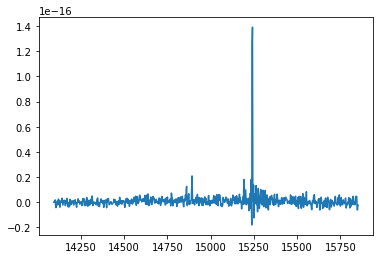

In [25]:
len_wl = cube_final.shape[2]
start = hdr_dict['CRVAL3']
end = start + len_wl*hdr_dict['CDELT3']
step = hdr_dict['CDELT3']
plt.plot(np.arange(start, end, step), cube_final[620,1024,:])

In [32]:
axis = np.linspace(start, end, len_wl)
print(axis[1]-axis[0])

2.0947203584873932


In [27]:
print(len(np.arange(start, end, step)), cube_final.shape[2])

842 842


In [10]:
#cube = SpectralCube.read(fits.open('/home/carterrhea/pCloudDrive/Research/Perseus/Sitelle/NGC1275.fits'), memmap=False)  
#its.open('/media/carterrhea/carterrhea/M33/M33_Field7_SN3.merged.cm1.1.0.hdf5')
#cube = SpectralCube(cube_final, wcs=wcs_data)

In [11]:
shape = (hdu.header["NAXIS1"], hdu.header["NAXIS2"])

reg_name = "/media/carterrhea/carterrhea/M33/central.reg"
r = pyregion.open(reg_name).as_imagecoord(hdu.header)
m = r.get_mask(shape=shape)
m



array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [12]:
new_x = np.ma.masked_array(cube_final[:,:,0], m)

In [ ]:
###### region_list = regions.read_ds9('/media/carterrhea/carterrhea/M33/central.reg')  
sub_cube = cube.subcube_from_regions(region_list)
sub_cube.shape

In [167]:
slice_unmasked = sub_cube.unmasked_data[:,:,600]  
plt.imshow(np.log10(np.abs(slice_unmasked)))

IndexError: index 600 is out of bounds for axis 2 with size 152